In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [48]:
data = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\airline-passengers.csv")
data
data['Month'] = pd.to_datetime(data['Month'])
data.set_index("Month", inplace= True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [49]:
data.dtypes

Passengers    int64
dtype: object

Text(0, 0.5, 'Passengers')

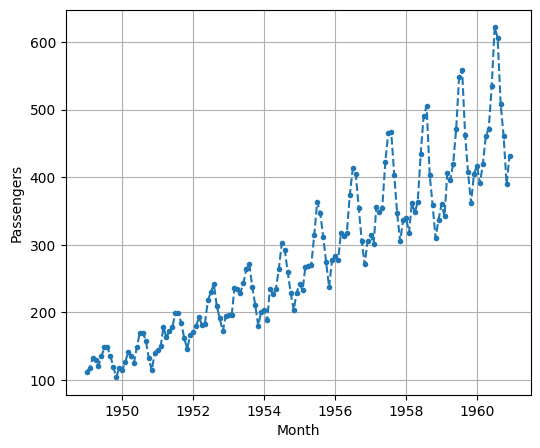

In [3]:
data1 = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\airline-passengers.csv")
data1
data1.Month = pd.to_datetime(data1["Month"])
data1.set_index("Month", inplace=True)
data1
plt.figure(figsize=(6,5))
plt.grid()
plt.plot(data1.index, data1["Passengers"], "--", marker = ".")
plt.xlabel("Month")
plt.ylabel("Passengers")


Text(0, 0.5, 'Month')

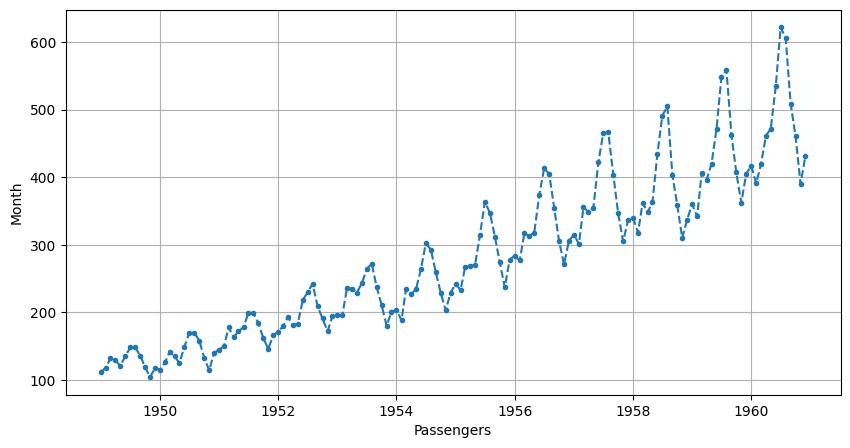

In [4]:
plt.figure(figsize= (10,5))
plt.plot(data.index, data['Passengers'], "--", marker = '.' )
plt.grid()
plt.xlabel("Passengers")
plt.ylabel("Month")

In [5]:
import numpy as np
df = {"name": [22, 23], "ra": [21,11], "da": [12,10]}
d = pd.DataFrame(df)
d["name"] = np.nan
d

,name,ra,da
0,NaN,21,12
1,NaN,11,10


In [6]:
df_copy =  data1.copy()
row = df_copy.sample(frac = 0.1, random_state = 0)
row["Passengers"] = np.nan
df_copy.loc[row.index, "Passengers"] = row["Passengers"]
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [7]:
df_copy_ff = df_copy.fillna(method='ffill')
df_copy_ff.isnull().sum()

# Backward fill
df_copy_bf = df_copy.fillna(method= 'bfill')
df_copy_bf.isnull().sum()

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_9988\357180377.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_ff = df_copy.fillna(method='ffill')
C:\Users\Kaybee\AppData\Local\Temp\ipykernel_9988\357180377.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy_bf = df_copy.fillna(method= 'bfill')


Passengers    0
dtype: int64

In [8]:
# Interpolate results
df_copy_if = df_copy.interpolate(method='linear', limit_direction= 'forward')
df_copy_if.isnull().sum()

df_copy_ib =  df_copy.interpolate(method='linear', limit_direction= 'backward')
df_copy_ib.isnull().sum()

Passengers    0
dtype: int64

C:\Users\Kaybee\AppData\Local\Temp\ipykernel_9988\233195175.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_quarterly = df_copy.resample('3M').mean()


Text(0, 0.5, 'Passengers')

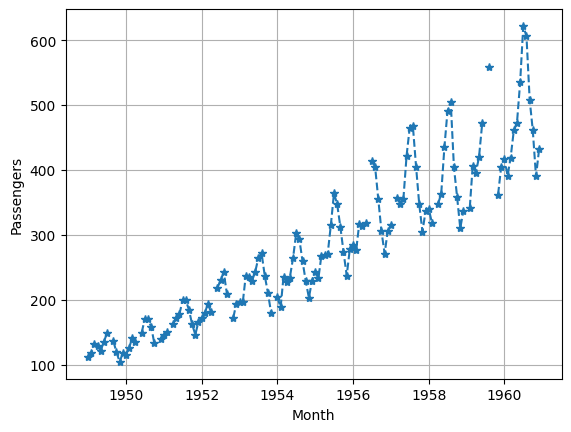

In [9]:
# Downsample
df_quarterly = df_copy.resample('3M').mean()
df_quarterly
plt.plot(df_copy.index, df_copy["Passengers"], "--", marker = "*")
plt.grid()
plt.xlabel("Month")
plt.ylabel("Passengers")

Text(0, 0.5, 'Passengers')

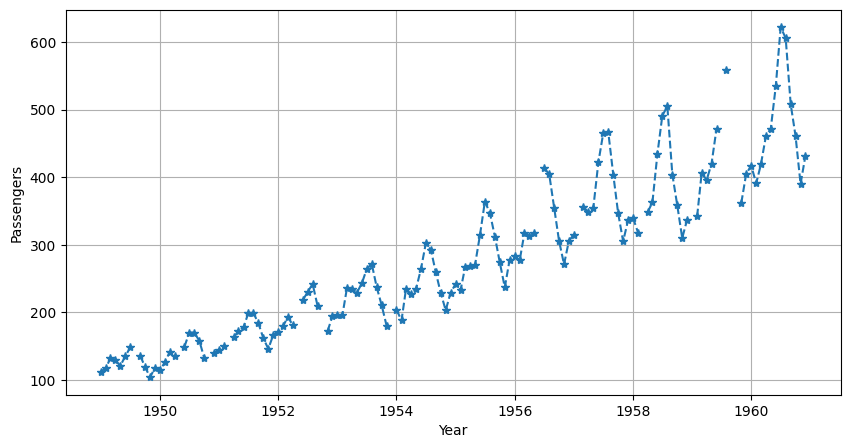

In [10]:
# Upsample
df_daily = df_copy.resample('D').mean()
df_daily
plt.figure(figsize=(10,5))
plt.plot(df_copy.index, df_copy["Passengers"], "--", marker = "*")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Passengers")
# plt.figure(figsize=(10, 4))
# plt.plot(df_daily,  )

#### Smoothening to remove noise from Dataset

Text(0, 0.5, 'Passengers')

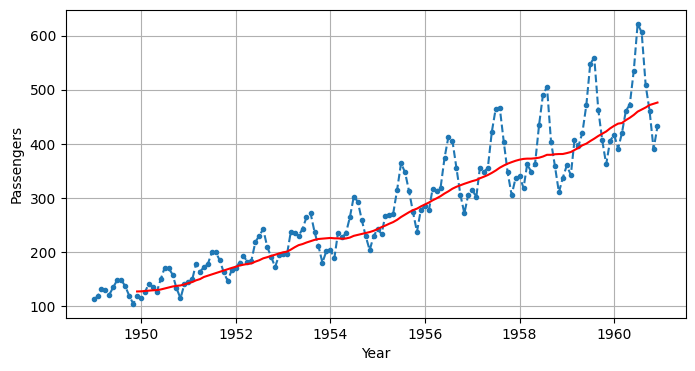

In [11]:
df_smooth = data1.copy()
plt.figure(figsize=(8,4))
plt.plot(df_smooth.index, df_smooth["Passengers"], "--", marker = ".")
plt.plot(df_smooth["Passengers"].rolling(12).mean(), color = 'red')

plt.grid()
plt.xlabel("Year")
plt.ylabel("Passengers")

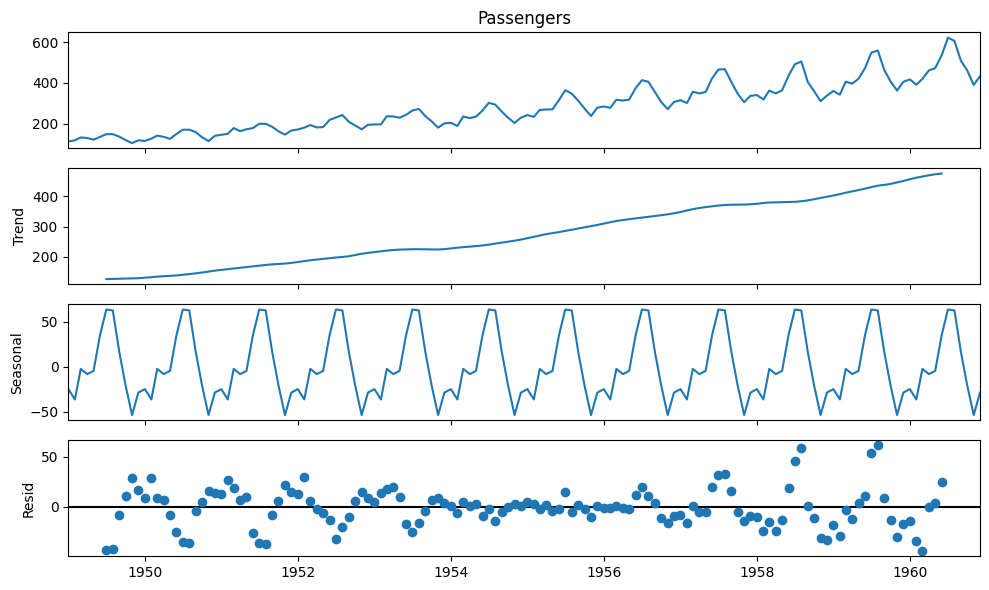

In [12]:
import statsmodels.api as sm
from pylab import rcParams
rcParams["figure.figsize"] = 10,6
decomp_series = sm.tsa.seasonal_decompose(data1["Passengers"], model='additive')
decomp_series.plot()
plt.show()

##### It is observed that there is an obvious increasing trend and seasonality variations. The Data is not stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data1["Passengers"])
adf_result
print(f"ADF Statistics: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[3]}")
print(f"No. of observtions used: {adf_result[4]}")
print(f"Critical Values:")
for n, v in adf_result[4].items():
    print(f"{n}: {v}")

ADF Statistics: 0.8153688792060482
p-value: 0.991880243437641
No. of lags used: 130
No. of observtions used: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


##### p-values is greater than critical value and ADF statistic is greater than any of the critical values obtained.
## Converting the series to stationary by removing trend and seasonality.

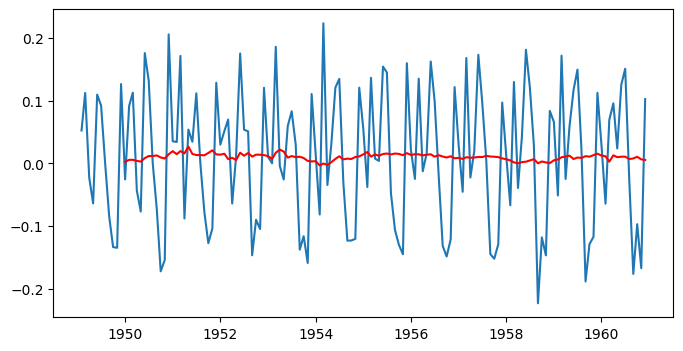

In [14]:
df_log = np.log(data1)
df_diff = df_log.diff(periods = 1)
plt.figure(figsize=(8,4))
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color = 'red')

#### Using Stochastic Models

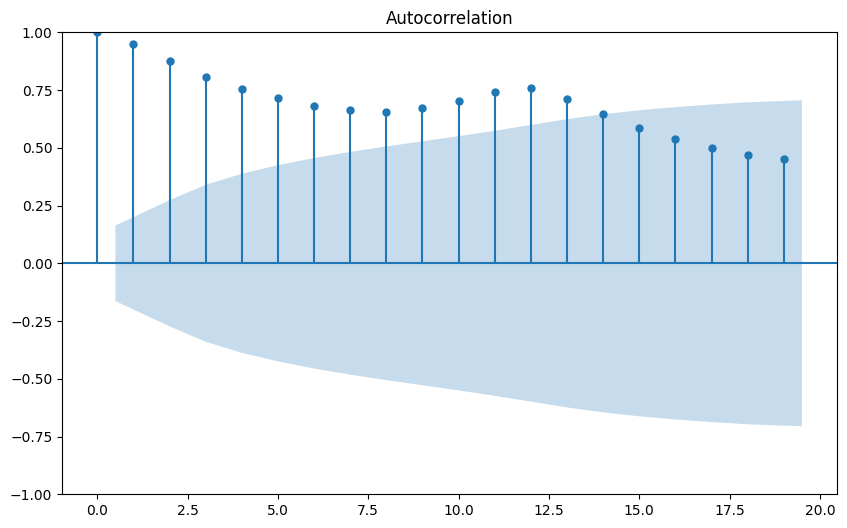

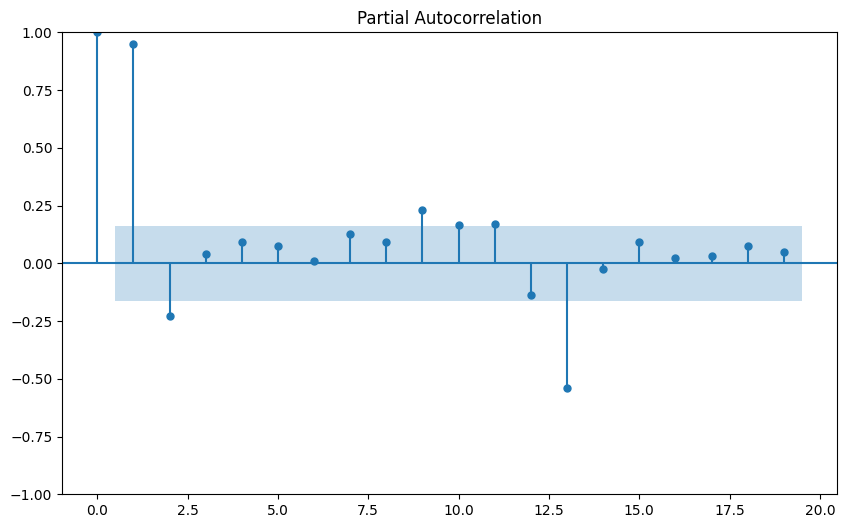

In [15]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF
plot_acf(data1, lags = range(0, 20))
plt.show()
# PACF
plot_pacf(data1, lags = range(0, 20))
plt.show()

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


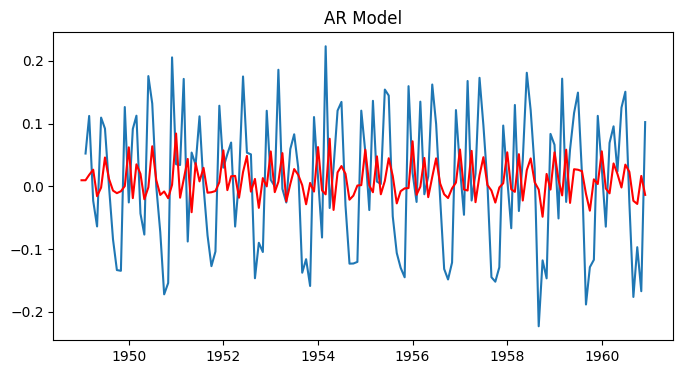

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# (p,d, q)
AR_model = ARIMA(df_diff, order = (2, 0, 0))
AR_model_results = AR_model.fit()
plt.figure(figsize=(8,4))
plt.title("AR Model")
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color = 'red')

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


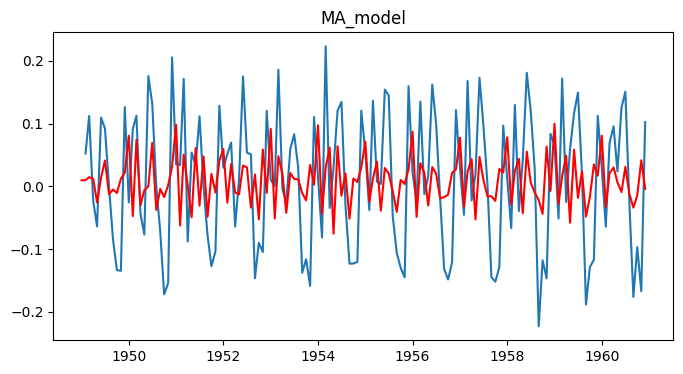

In [17]:
# Moving Average model
MA_model = ARIMA(df_diff, order=  (0, 0, 2))
MA_model_results = MA_model.fit()
plt.figure(figsize=(8,4))
plt.title("MA_model")
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color = 'red')

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


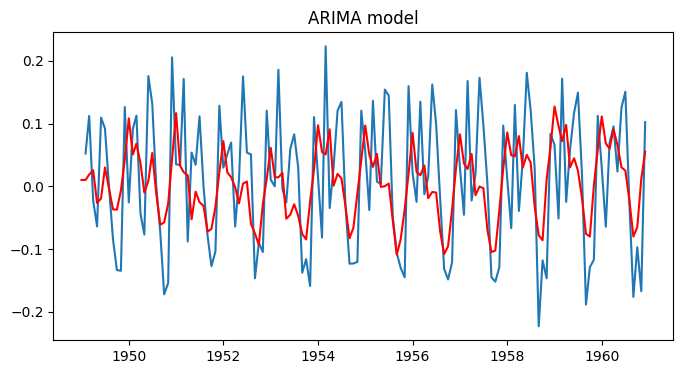

In [18]:
# ARIMA model
ARIMA_model = ARIMA(df_diff, order=(2, 0, 1))
ARIMA_model_results = ARIMA_model.fit()
plt.figure(figsize=(8,4))
plt.title("ARIMA model")
plt.plot(df_diff)
plt.plot(ARIMA_model_results.fittedvalues, color = 'red')

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
09:21:14 - cmdstanpy - INFO - Chain [1] start processing
09:21:16 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Kaybee\AppData\Roaming\Python\

<Figure size 500x500 with 0 Axes>

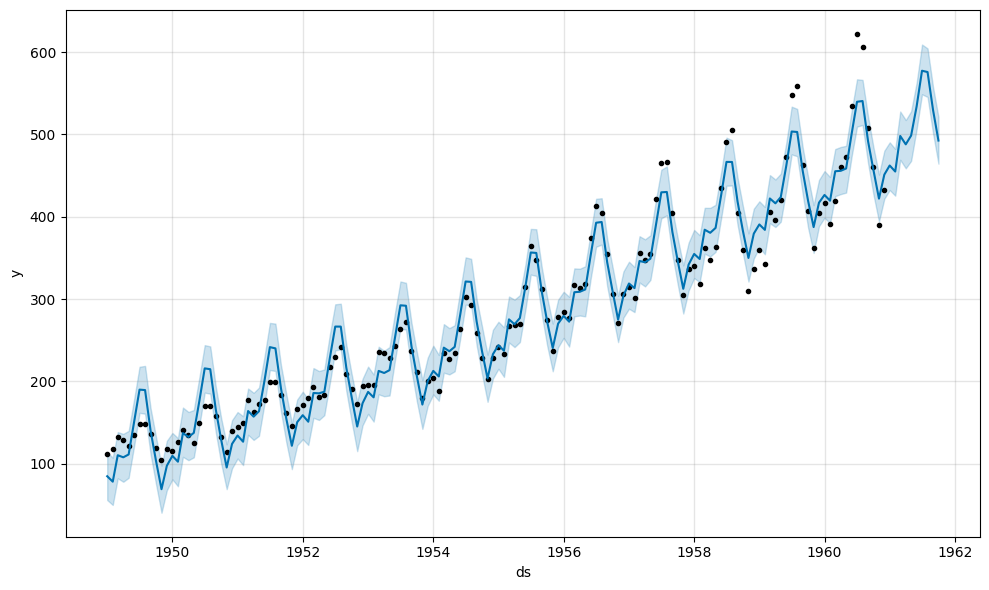

In [19]:
# %pip install prophet
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
rd_data = pd.read_csv(r"C:\Users\Kaybee\Videos\Internship_hamoyeHQ\stageE\airline-passengers.csv")
rd_data["Month"] = pd.to_datetime(rd_data["Month"])
# rn_col =
rd_data = rd_data.rename(columns= {"Month": "ds", "Passengers": "y"})
rd_data.head()
model = Prophet()
model.fit(rd_data)

# Predicting for the next 10 months
future = model.make_future_dataframe(periods=10, freq= 'M')
forecast = model.predict(future)
forecast.head()
# yhat is the prediction, while yhat_lower and yhat_upper are the upper and lower boundaries.

plt.figure(figsize=(5,5))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper' ]]


model.plot(forecast)
plt.show()

In [1]:
na = ["ba", "ta", "ra", "ca", "rab"]
na[:-3]

['ba', 'ta']

In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,55.901732,114.033557,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,49.932543,107.317506,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,82.293558,138.454854,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,78.102802,136.273305,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,82.904927,139.910682,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


Text(0, 0.5, 'trend')

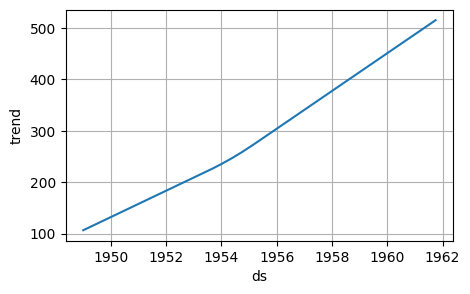

In [21]:
plt.figure(figsize=(5,3))
plt.grid()
plt.plot(forecast["ds"], forecast["trend"])
plt.xlabel("ds")
plt.ylabel("trend")

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,year,Day of year
0,1949-01-01,106.662426,55.901732,114.033557,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159,January 01,January 01
1,1949-02-01,108.835452,49.932543,107.317506,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931,February 01,February 01
2,1949-03-01,110.798186,82.293558,138.454854,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237,March 01,March 01
3,1949-04-01,112.971212,78.102802,136.273305,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718,April 01,April 01
4,1949-05-01,115.074141,82.904927,139.910682,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255,May 01,May 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1961-05-31,502.788194,506.572267,562.810147,502.613923,502.966988,31.376132,31.376132,31.376132,31.376132,31.376132,31.376132,0.0,0.0,0.0,534.164325,May 31,May 31
150,1961-06-30,505.805027,548.704856,609.151734,505.578384,506.042674,71.502640,71.502640,71.502640,71.502640,71.502640,71.502640,0.0,0.0,0.0,577.307667,June 30,June 30
151,1961-07-31,508.922422,545.479251,604.467831,508.640254,509.210187,66.822238,66.822238,66.822238,66.822238,66.822238,66.822238,0.0,0.0,0.0,575.744659,July 31,July 31
152,1961-08-31,512.039817,501.184834,557.244809,511.684460,512.398102,17.287630,17.287630,17.287630,17.287630,17.287630,17.287630,0.0,0.0,0.0,529.327446,August 31,August 31


Text(0, 0.5, 'yearly')

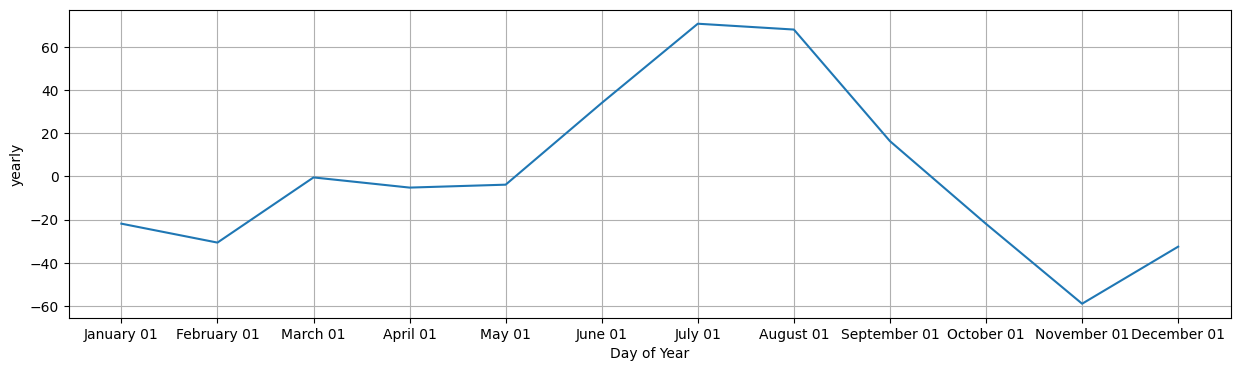

In [46]:
forecast["Day of year"] = forecast["ds"].dt.strftime('%B %d')
fore = forecast.head(12)
# forecast
plt.figure(figsize=(15, 4))
plt.grid()
plt.plot(fore["Day of year"], fore["yearly"])
plt.xlabel("Day of Year")
plt.ylabel("yearly")